In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# khoa_buoy_test : 수정 완료

In [74]:
khoa_buoy_test = pd.read_csv("../data/weather_data/processed/khoa_buoy_test(수정).csv",encoding='cp949').drop('Unnamed: 0',axis=1)
khoa_buoy_test['시간'] = pd.to_datetime(khoa_buoy_test['시간'], format='%Y%m%d%H%M')
khoa_buoy_test['날짜'] = pd.to_datetime(khoa_buoy_test['시간'].apply(lambda x: x.strftime('%Y-%m-%d')))
khoa_buoy_test['날짜_시간'] = khoa_buoy_test['시간'].apply(lambda x: x.strftime('%H:%M'))
print(khoa_buoy_test.shape)
khoa_buoy_test.head()

(464832, 7)


,시간,지점명,유속,유향,우행,날짜,날짜_시간
0,2022-07-01 00:00:00,SongJeong,102.7,NE,52.0,2022-07-01,00:00
1,2022-07-01 00:05:00,SongJeong,101.6,NE,52.0,2022-07-01,00:05
2,2022-07-01 00:10:00,SongJeong,98.9,NE,51.0,2022-07-01,00:10
3,2022-07-01 00:15:00,SongJeong,98.3,NE,53.0,2022-07-01,00:15
4,2022-07-01 00:20:00,SongJeong,96.3,NE,53.0,2022-07-01,00:20


In [73]:
khoa_buoy_test

,시간,지점명,유속,유향,우행
0,202207010000,SongJeong,102.7,NE,52.0
1,202207010005,SongJeong,101.6,NE,52.0
2,202207010010,SongJeong,98.9,NE,51.0
3,202207010015,SongJeong,98.3,NE,53.0
4,202207010020,SongJeong,96.3,NE,53.0
...,...,...,...,...,...
464827,202303262355,Haeundae,-99.9,-99.9,-99.9
464828,202303262356,Haeundae,23.6,SE,146.0
464829,202303262357,Haeundae,23.2,SE,143.0
464830,202303262358,Haeundae,23.4,SE,145.0


In [119]:
khoa_buoy_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464832 entries, 0 to 464831
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   시간      464832 non-null  int64  
 1   지점명     464832 non-null  object 
 2   유속      464832 non-null  float64
 3   유향      464832 non-null  object 
 4   우행      464832 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 17.7+ MB


In [120]:
khoa_buoy_test.describe()

,시간,유속,우행
count,4.648320e+05,464832.000000,464832.000000
mean,2.022389e+11,-0.463587,108.367131
std,4.299984e+07,48.590187,128.759386
min,2.022070e+11,-99.900000,-99.900000
25%,2.022091e+11,3.900000,45.000000
50%,2.022111e+11,12.200000,97.000000
75%,2.023012e+11,23.000000,230.000000
max,2.023033e+11,160.700000,376.000000


In [167]:
np.sum(khoa_buoy_test['우행']>360)

250

이상치 = 유속 : -99.900000	우행 :-99.900000

In [121]:
khoa_buoy_test['지점명'].unique()

array(['SongJeong', 'Haeundae'], dtype=object)

## 중복확인

In [123]:
khoa_buoy_test[khoa_buoy_test.duplicated()==True].count()

시간     0
지점명    0
유속     0
유향     0
우행     0
dtype: int64

## 시간데이터프레임

In [3]:
khoa_buoy_test['시간']=pd.to_datetime(khoa_buoy_test['시간'], format='%Y%m%d%H%M')
khoa_buoy_test['시간']

0        2022-07-01 00:00:00
1        2022-07-01 00:05:00
2        2022-07-01 00:10:00
3        2022-07-01 00:15:00
4        2022-07-01 00:20:00
                 ...        
464827   2023-03-26 23:55:00
464828   2023-03-26 23:56:00
464829   2023-03-26 23:57:00
464830   2023-03-26 23:58:00
464831   2023-03-26 23:59:00
Name: 시간, Length: 464832, dtype: datetime64[ns]

## 지점분리

In [37]:
khoa_buoy_test_SongJeong = khoa_buoy_test[khoa_buoy_test['지점명']=='SongJeong']reset_index(drop=True)

In [11]:
khoa_buoy_test_Haeundae =khoa_buoy_test[khoa_buoy_test['지점명']=='Haeundae'].reset_index(drop=True)

In [71]:
# khoa_buoy_test_SongJeong[(khoa_buoy_test_SongJeong['시간']>='2022-07-03 00:00:00')&(khoa_buoy_test_SongJeong['시간']<'2022-07-04 00:00:00')]
khoa_buoy_test_SongJeong['날짜'] = pd.to_datetime(khoa_buoy_test_SongJeong['시간'].apply(lambda x: x.strftime('%Y-%m-%d')))
khoa_buoy_test_SongJeong['날짜_시간'] = khoa_buoy_test_SongJeong['시간'].apply(lambda x: x.strftime('%H:%M'))
khoa_buoy_test_SongJeong

,시간,지점명,유속,유향,우행,날짜,날짜_시간
0,2022-07-01 00:00:00,SongJeong,102.7,NE,52.0,2022-07-01,00:00
1,2022-07-01 00:05:00,SongJeong,101.6,NE,52.0,2022-07-01,00:05
2,2022-07-01 00:10:00,SongJeong,98.9,NE,51.0,2022-07-01,00:10
3,2022-07-01 00:15:00,SongJeong,98.3,NE,53.0,2022-07-01,00:15
4,2022-07-01 00:20:00,SongJeong,96.3,NE,53.0,2022-07-01,00:20
...,...,...,...,...,...,...,...
77467,2023-03-26 23:35:00,SongJeong,16.0,NE,35.0,2023-03-26,23:35
77468,2023-03-26 23:40:00,SongJeong,20.0,NE,44.0,2023-03-26,23:40
77469,2023-03-26 23:45:00,SongJeong,23.9,NE,52.0,2023-03-26,23:45
77470,2023-03-26 23:50:00,SongJeong,24.7,NE,48.0,2023-03-26,23:50


In [65]:
khoa_buoy_test_SongJeong.groupby('날짜').count()

,시간,지점명,유속,유향,우행
날짜,,,,,
2022-07-01,288,288,288,288,288
2022-07-02,288,288,288,288,288
2022-07-03,288,288,288,288,288
2022-07-04,288,288,288,288,288
2022-07-05,288,288,288,288,288
...,...,...,...,...,...
2023-03-22,288,288,288,288,288
2023-03-23,288,288,288,288,288
2023-03-24,288,288,288,288,288


In [53]:
khoa_buoy_test_SongJeong.loc[45,'시간'], khoa_buoy_test_SongJeong.loc[44,'시간']+pd.to_timedelta(300000000000)

(Timestamp('2022-07-01 03:45:00'), Timestamp('2022-07-01 03:45:00'))

In [51]:
idx_list = []
for i in range(len(khoa_buoy_test_SongJeong)-1):
    if khoa_buoy_test_SongJeong.loc[i+1,'시간'] != khoa_buoy_test_SongJeong.loc[i,'시간']+pd.to_timedelta(300000000000):
        print(i)
        idx_list.append(i)

In [47]:
idx_list

[]

In [141]:
khoa_buoy_test_Haeundae

,시간,지점명,유속,유향,우행
0,2022-07-01 00:00:00,Haeundae,32.7,E,86.0
1,2022-07-01 00:01:00,Haeundae,-99.9,-99.9,-99.9
2,2022-07-01 00:02:00,Haeundae,37.0,E,86.0
3,2022-07-01 00:03:00,Haeundae,36.5,E,88.0
4,2022-07-01 00:04:00,Haeundae,36.9,E,88.0
...,...,...,...,...,...
387355,2023-03-26 23:55:00,Haeundae,-99.9,-99.9,-99.9
387356,2023-03-26 23:56:00,Haeundae,23.6,SE,146.0
387357,2023-03-26 23:57:00,Haeundae,23.2,SE,143.0
387358,2023-03-26 23:58:00,Haeundae,23.4,SE,145.0


## 시간 결측치 확인

### 지점간 시간 결측치 확인

- 해운대 : 1분단위 , 시간 결측치 없음

In [6]:
time = pd.date_range(start='2022-07-01 00:00:00', end='2023-03-26 23:59:00', freq='1min')
time_range = pd.DataFrame(time, columns=['시간'])
print(khoa_buoy_test_Haeundae['시간'].count())
print(np.sum(time_range.isin(khoa_buoy_test_Haeundae['시간'])))

387360
시간    387360
dtype: int64


- 송정 : 5분단위 , 시간 결측치 있음

In [7]:
time = pd.date_range(start='2022-07-01 00:00:00', end='2023-03-26 23:55:00', freq='5min')
time_range = pd.DataFrame(time, columns=['시간'])
print(khoa_buoy_test_SongJeong['시간'].count())
print(np.sum(time_range.isin(khoa_buoy_test_SongJeong['시간'])))

77472
시간    52992
dtype: int64


In [8]:
khoa_buoy_test_SongJeong=khoa_buoy_test_SongJeong.set_index('시간')

In [197]:
time

DatetimeIndex(['2022-07-01 00:00:00', '2022-07-01 00:05:00',
               '2022-07-01 00:10:00', '2022-07-01 00:15:00',
               '2022-07-01 00:20:00', '2022-07-01 00:25:00',
               '2022-07-01 00:30:00', '2022-07-01 00:35:00',
               '2022-07-01 00:40:00', '2022-07-01 00:45:00',
               ...
               '2023-03-26 23:10:00', '2023-03-26 23:15:00',
               '2023-03-26 23:20:00', '2023-03-26 23:25:00',
               '2023-03-26 23:30:00', '2023-03-26 23:35:00',
               '2023-03-26 23:40:00', '2023-03-26 23:45:00',
               '2023-03-26 23:50:00', '2023-03-26 23:55:00'],
              dtype='datetime64[ns]', length=77472, freq='5T')

In [164]:
khoa_buoy_test_SongJeong[]

,시간,지점명,유속,유향,우행
0,2022-07-01 00:00:00,SongJeong,102.7,NE,52.0
1,2022-07-01 00:05:00,SongJeong,101.6,NE,52.0
2,2022-07-01 00:10:00,SongJeong,98.9,NE,51.0
3,2022-07-01 00:15:00,SongJeong,98.3,NE,53.0
4,2022-07-01 00:20:00,SongJeong,96.3,NE,53.0
...,...,...,...,...,...
342427,2023-03-26 23:35:00,SongJeong,16.0,NE,35.0
342428,2023-03-26 23:40:00,SongJeong,20.0,NE,44.0
342429,2023-03-26 23:45:00,SongJeong,23.9,NE,52.0
342430,2023-03-26 23:50:00,SongJeong,24.7,NE,48.0


In [180]:
time_range

,시간
0,2022-07-01 00:00:00
1,2022-07-01 00:05:00
2,2022-07-01 00:10:00
3,2022-07-01 00:15:00
4,2022-07-01 00:20:00
...,...
77467,2023-03-26 23:35:00
77468,2023-03-26 23:40:00
77469,2023-03-26 23:45:00
77470,2023-03-26 23:50:00


In [187]:
time_range.isin(khoa_buoy_test_SongJeong['시간'])[time_range.isin(khoa_buoy_test_SongJeong['시간'])==False]

,시간
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
77467,False
77468,False
77469,False
77470,False


In [195]:
time_range[time_range.isin(khoa_buoy_test_SongJeong['시간'])['시간']==False]

,시간
52992,2023-01-01 00:00:00
52993,2023-01-01 00:05:00
52994,2023-01-01 00:10:00
52995,2023-01-01 00:15:00
52996,2023-01-01 00:20:00
...,...
77467,2023-03-26 23:35:00
77468,2023-03-26 23:40:00
77469,2023-03-26 23:45:00
77470,2023-03-26 23:50:00


In [174]:
time_range.isin(khoa_buoy_test_SongJeong['시간'])[time_range.isin(khoa_buoy_test_SongJeong['시간'])==False]

RangeIndex(start=0, stop=77472, step=1)

In [183]:
time_range[time_range.isin(khoa_buoy_test_SongJeong['시간'])==False].index

RangeIndex(start=0, stop=77472, step=1)

## 시간 - 시간과 날짜 분리

In [90]:
khoa_buoy_test['날짜']=khoa_buoy_test['시간'].apply(lambda x : str(x).split()[0])
khoa_buoy_test['시간']=khoa_buoy_test['시간'].apply(lambda x : str(x).split()[1])

## 이상치 확인

In [97]:
print(khoa_buoy_test[khoa_buoy_test['유속']==-99.9]['유속'].count())
print(khoa_buoy_test[khoa_buoy_test['우행']==-99.9]['우행'].count())

80714
80694


In [100]:
khoa_buoy_test[khoa_buoy_test['유속']!=-99.9].describe()
# 이상치가 더 많은 유속 이상치를 드랍하니 우행 이상치도 드랍됨

,유속,우행
count,384118.000000,384118.000000
mean,20.430802,152.116206
std,18.516921,95.056639
min,0.000000,0.000000
25%,8.000000,80.000000
50%,15.600000,110.000000
75%,25.800000,248.000000
max,160.700000,376.000000


In [104]:
khoa_buoy_test_outlier = khoa_buoy_test[khoa_buoy_test['유속']==-99.9]

### 이상치 날짜

In [114]:
pd.set_option('display.max_rows',None)
print(khoa_buoy_test_outlier['날짜'].value_counts(sort=False))

2022-07-01      49
2022-07-02      32
2022-07-03     138
2022-07-04      46
2022-07-05      47
2022-07-06     134
2022-07-07      35
2022-07-08      68
2022-07-09      46
2022-07-10      39
2022-07-11      48
2022-07-12      55
2022-07-13      39
2022-07-14      32
2022-07-15      53
2022-07-16      61
2022-07-17     133
2022-07-18      41
2022-07-19      49
2022-07-20      53
2022-07-21      47
2022-07-22      48
2022-07-23      44
2022-07-24      39
2022-07-25     108
2022-07-26      82
2022-07-27      40
2022-07-28      43
2022-07-29      32
2022-07-30      51
2022-07-31      34
2022-08-01      45
2022-08-02      38
2022-08-03      49
2022-08-04      40
2022-08-05      44
2022-08-06      36
2022-08-07      30
2022-08-08      46
2022-08-09      40
2022-08-10      39
2022-08-11      58
2022-08-12      39
2022-08-13      44
2022-08-14     137
2022-08-15      46
2022-08-16      40
2022-08-17      38
2022-08-18      36
2022-08-19      44
2022-08-20      40
2022-08-21      57
2022-08-22  

### 이상치 시간

In [116]:
print(khoa_buoy_test_outlier['시간'].value_counts().sort_index())

00:00:00    55
00:01:00    55
00:02:00    48
00:03:00    48
00:04:00    48
00:05:00    53
00:06:00    52
00:07:00    50
00:08:00    48
00:09:00    49
00:10:00    66
00:11:00    51
00:12:00    51
00:13:00    48
00:14:00    50
00:15:00    56
00:16:00    54
00:17:00    47
00:18:00    48
00:19:00    49
00:20:00    64
00:21:00    59
00:22:00    55
00:23:00    49
00:24:00    48
00:25:00    51
00:26:00    52
00:27:00    49
00:28:00    50
00:29:00    53
00:30:00    62
00:31:00    56
00:32:00    50
00:33:00    47
00:34:00    48
00:35:00    58
00:36:00    51
00:37:00    53
00:38:00    53
00:39:00    53
00:40:00    61
00:41:00    54
00:42:00    52
00:43:00    48
00:44:00    50
00:45:00    54
00:46:00    51
00:47:00    50
00:48:00    49
00:49:00    48
00:50:00    63
00:51:00    53
00:52:00    49
00:53:00    50
00:54:00    48
00:55:00    56
00:56:00    51
00:57:00    50
00:58:00    47
00:59:00    49
01:00:00    56
01:01:00    57
01:02:00    54
01:03:00    54
01:04:00    53
01:05:00    59
01:06:00  

In [117]:
pd.options.display.max_rows = 100

In [59]:
time = pd.date_range(start='2022-07-01 00:00:00', end='2023-03-31 23:59:00', freq='1min')

time_range = pd.DataFrame(time, columns=['시간'])
time_range

,시간
0,2022-07-01 00:00:00
1,2022-07-01 00:01:00
2,2022-07-01 00:02:00
3,2022-07-01 00:03:00
4,2022-07-01 00:04:00
...,...
394555,2023-03-31 23:55:00
394556,2023-03-31 23:56:00
394557,2023-03-31 23:57:00
394558,2023-03-31 23:58:00


In [60]:
time_range.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394560 entries, 0 to 394559
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   시간      394560 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.0 MB


In [61]:
np.sum(time_range.isin(khoa_buoy_test['시간'])['시간']==False)

0

In [62]:
np.sum(time_range.isin(khoa_buoy_test['시간'])['시간']==True)

394560

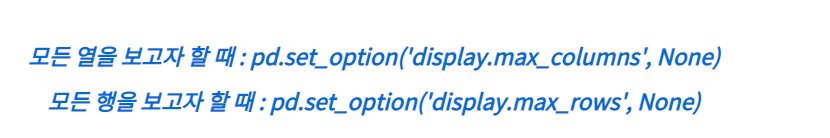

In [28]:
#pd.set_option('display.max_rows',None)

In [40]:
pd.options.display.max_rows = 100

In [63]:
khoa_buoy_test_weird = khoa_buoy_test[khoa_buoy_test['유향']==-999]

In [64]:
khoa_buoy_test_weird['날짜']=khoa_buoy_test_weird['시간'].apply(lambda x : str(x).split()[0])

In [65]:
khoa_buoy_test_weird['시간'] = khoa_buoy_test_weird['시간'].apply(lambda x : str(x).split()[1])

In [67]:
khoa_buoy_test_weird['날짜'].value_counts(sort=False)

2022-07-01     2
2022-07-05    12
2022-07-06     2
2022-07-07    30
2022-07-08     2
              ..
2023-03-25     1
2023-03-28     6
2023-03-29     7
2023-03-30     6
2023-03-31     2
Name: 날짜, Length: 197, dtype: int64

In [68]:
khoa_buoy_test_weird[['시간']].value_counts().sort_index()

시간      
00:00:00    90
00:01:00    91
00:02:00    91
00:03:00    91
00:04:00    91
            ..
23:55:00    89
23:56:00    89
23:57:00    89
23:58:00    89
23:59:00    89
Length: 1440, dtype: int64

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글세팅

In [ ]:
plt.figure(figsize=(32,28))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='구매건수', marker='o')
plt.plot(khoa_buoy_test_999['시간'], khoa_buoy_test_999['유향'], color='cyan', linestyle='-', marker='p', markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('유향 추이')  # 그래프 제목 설정
plt.xlabel('시간')  # x축 레이블 설정
plt.ylabel('유향')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

In [ ]:
filtered_df = khoa_buoy_test_999[khoa_buoy_test['시간'].between('2022-07-01 00:00:00', '2022-07-01 23:59:59')]
filtered_df

In [ ]:
plt.figure(figsize=(32,28))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='구매건수', marker='o')
plt.plot(filtered_df['시간'], filtered_df['유향'], color='cyan', linestyle='-', marker='p', markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('2022년 7월1일 유향 추이')  # 그래프 제목 설정
plt.xlabel('시간')  # x축 레이블 설정
plt.ylabel('유향')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

In [ ]:
plt.figure(figsize=(32,28))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='구매건수', marker='o')
plt.plot(filtered_df['시간'], filtered_df['유속'], color='cyan', linestyle='-', marker='p', markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('2022년 7월1일 유속 추이')  # 그래프 제목 설정
plt.xlabel('시간')  # x축 레이블 설정
plt.ylabel('유속')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

In [ ]:
# khoa_buoy_test.to_csv('../data/weather_data/preprocessed_data/khoa_buoy_test.csv')

# khoa_buoy_train : 수정중

In [41]:
khoa_buoy_train = pd.read_csv("../data/weather_data/processed/khoa_buoy_train(수정).csv",encoding='cp949').drop('Unnamed: 0',axis=1)
print(khoa_buoy_train.shape)
khoa_buoy_train.head()

(943488, 5)


,시간,지점명,유속,유향,우행
0,202101010000,SongJeong,45.3,NE,49.0
1,202101010005,SongJeong,43.0,NE,48.0
2,202101010010,SongJeong,45.0,NE,50.0
3,202101010015,SongJeong,44.8,NE,48.0
4,202101010020,SongJeong,43.2,NE,49.0


In [42]:
khoa_buoy_train 

,시간,지점명,유속,유향,우행
0,202101010000,SongJeong,45.3,NE,49.0
1,202101010005,SongJeong,43.0,NE,48.0
2,202101010010,SongJeong,45.0,NE,50.0
3,202101010015,SongJeong,44.8,NE,48.0
4,202101010020,SongJeong,43.2,NE,49.0
...,...,...,...,...,...
943483,202206302355,Haeundae,32.3,E,90.0
943484,202206302356,Haeundae,32.3,E,89.0
943485,202206302357,Haeundae,31.4,E,86.0
943486,202206302358,Haeundae,31.7,E,90.0


In [ ]:
khoa_buoy_test = pd.read_csv("../data/weather_data/processed/khoa_buoy_test(수정).csv",encoding='cp949').drop('Unnamed: 0',axis=1)
print(khoa_buoy_test.shape)
khoa_buoy_test.head()

In [ ]:
khoa_buoy_train['시간']

In [ ]:
khoa_buoy_train['시간']=pd.to_datetime(khoa_buoy_train['시간'], format='%Y%m%d%H%M')
khoa_buoy_train['시간']

In [ ]:
khoa_buoy_train

In [ ]:
khoa_buoy_train[khoa_buoy_train.duplicated()==True].count()

In [ ]:
khoa_buoy_train['지점명'].unique()

## 이상치 -999.0 제거

In [ ]:
print(khoa_buoy_train['시간'].min())
print(khoa_buoy_train['시간'].max())

print(khoa_buoy_train['유속'].min())
print(khoa_buoy_train['유속'].max())

print(khoa_buoy_train['유향'].min())
print(khoa_buoy_train['유향'].max())

print(khoa_buoy_train['우행'].min())
print(khoa_buoy_train['우행'].max())

In [ ]:
print(khoa_buoy_train[khoa_buoy_train['유속']!=-99.9]['유속'].min())
print(khoa_buoy_train[khoa_buoy_train['유속']!=-99.9]['유속'].max())

print(khoa_buoy_train[khoa_buoy_train['유향']!='-99.9']['유향'].min())
print(khoa_buoy_train[khoa_buoy_train['유향']!='-99.9']['유향'].max())

print(khoa_buoy_train[khoa_buoy_train['우행']!=-99.9]['우행'].min())
print(khoa_buoy_train[khoa_buoy_train['우행']!=-99.9]['우행'].max())

In [ ]:
khoa_buoy_train['유향'].unique()

#### 시간 2021-01-01 ~ 2022-06-30

#### 지점명 송정(부산), 해운대(부산)

#### 유속 0.0-190.2

#### 유향 16가지 (N,S,E,W 등)

#### 우행 0.0-360.0

In [ ]:
# khoa_buoy_train.to_csv('../data/weather_data/preprocessed_data/khoa_buoy_train.csv')

# khnp_buoy_test : 수정중

In [ ]:
khnp_buoy_test = pd.read_csv("../data/weather_data/processed/khnp_buoy_test(수정).csv",encoding='cp949').drop('Unnamed: 0', axis=1)
print(khnp_buoy_test.shape)
khnp_buoy_test.head()

In [ ]:
khnp_buoy_test.info()

In [ ]:
khnp_buoy_test['시간']

In [ ]:
khnp_buoy_test['시간']=pd.to_datetime(khnp_buoy_test['시간'], format='%Y%m%d%H%M')
khnp_buoy_test['시간']

In [ ]:
khnp_buoy_test

In [ ]:
khnp_buoy_test[khnp_buoy_test.duplicated()==True].count()

In [ ]:
khnp_buoy_test['지점명'].unique()

## 이상치 -999.0 제거

In [ ]:
print(khnp_buoy_test['시간'].min())
print(khnp_buoy_test['시간'].max())

print(khnp_buoy_test['유속'].min())
print(khnp_buoy_test['유속'].max())

print(khnp_buoy_test['유향'].min())
print(khnp_buoy_test['유향'].max())

print(khnp_buoy_test['우행'].min())
print(khnp_buoy_test['우행'].max())

In [ ]:
print(khnp_buoy_test[khnp_buoy_test['유속']!=-99.9]['유속'].min())
print(khnp_buoy_test[khnp_buoy_test['유속']!=-99.9]['유속'].max())

print(khnp_buoy_test[khnp_buoy_test['유향']!='-99.9']['유향'].min())
print(khnp_buoy_test[khnp_buoy_test['유향']!='-99.9']['유향'].max())

print(khnp_buoy_test[khnp_buoy_test['우행']!=-99.9]['우행'].min())
print(khnp_buoy_test[khnp_buoy_test['우행']!=-99.9]['우행'].max())

In [ ]:
khnp_buoy_test['유향'].unique()

#### 시간 2022-07-01 ~ 2023-03-26

#### 지점명 송정(부산), 해운대(부산)

#### 유속 0.0-160.7

#### 유향 16가지 (N,S,E,W 등)

#### 우행 0.0-376.0

### 우행 376도가 의미하는 바는 무엇인가??

In [ ]:
# khnp_buoy_test.to_csv("../data/weather_data/preprocessed_data/khnp_buoy_test.csv",encoding='cp949')

# khnp_buoy_train : 수정 미완

In [ ]:
khnp_buoy_train=pd.read_csv("../data/weather_data/processed/khnp_buoy_train(수정).csv",encoding='cp949').drop('Unnamed: 0', axis=1)

In [ ]:
khnp_buoy_train['시간'] = pd.to_datetime(khnp_buoy_train['시간'], format='%Y%m%d%H%M')

In [ ]:
khnp_buoy_train= khnp_buoy_train.drop_duplicates(keep='first', ignore_index=True).set_index('시간')

In [ ]:
khnp_buoy_train.to_csv("../data/weather_data/preprocessed_data/khnp_buoy_train.csv",encoding='cp949')

# 결측치 확인

In [ ]:
import numpy as np

In [ ]:
np.sum(khoa_buoy_test.isna())

In [ ]:
np.sum(khoa_buoy_train.isna())

In [ ]:
np.sum(khnp_buoy_train.isna())

In [ ]:
np.sum(khnp_buoy_test.isna())

# 컬럼별 unique값 확인

In [ ]:
khoa_buoy_test['지점명'].unique()

In [ ]:
khoa_buoy_test.info()

In [ ]:
khoa_buoy_test.describe()